In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 

from imblearn.over_sampling import SMOTE
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/%20Medical%20Transcriptions/mtsamples.csv")
df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [3]:
df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')

In [6]:
df=df[['transcription','medical_specialty']]
df.head()

,transcription,medical_specialty
0,"SUBJECTIVE:, This 23-year-old white female pr...",Allergy / Immunology
1,"PAST MEDICAL HISTORY:, He has difficulty climb...",Bariatrics
2,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...",Bariatrics
3,"2-D M-MODE: , ,1. Left atrial enlargement wit...",Cardiovascular / Pulmonary
4,1. The left ventricular cavity size and wall ...,Cardiovascular / Pulmonary


In [7]:
df["medical_specialty"].value_counts()

 Surgery                          1103
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        372
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  230
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Obstetrics / Gynecology           160
 Urology                           158
 Discharge Summary                 108
 ENT - Otolaryngology               98
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    62
 Psychiatry / Psychology            53
 Office Notes                       51
 Podiatry                           47
 Dermatology                        29
 Cosmetic / Plastic Surgery         27
 Dentistry               

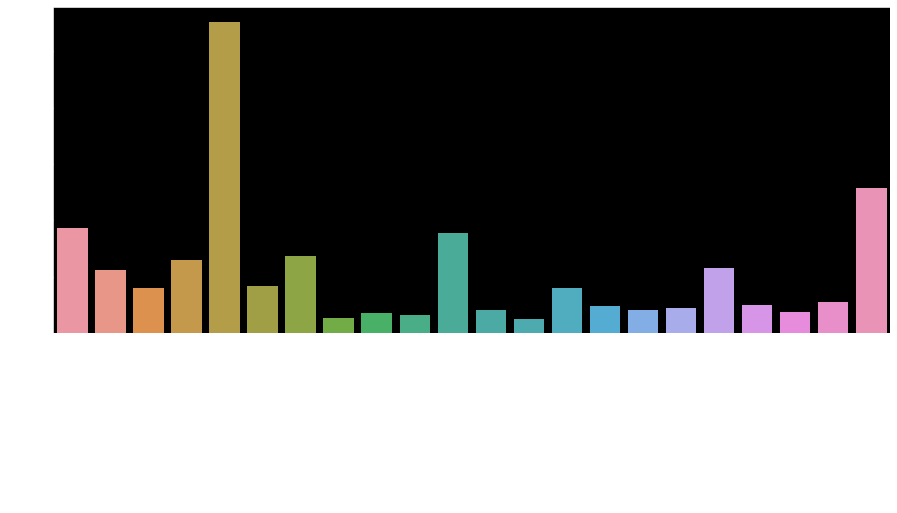

In [8]:
counts = df['medical_specialty'].value_counts()

df = df[~df['medical_specialty'].isin(counts[counts < 50].index)]
df['medical_specialty'].value_counts()
plt.figure(figsize=(15,6))
plt.style.use(['dark_background'])
plt.xticks(rotation=90)
sns.countplot(x='medical_specialty', data = df )
plt.show()

In [9]:
df.isna().sum()

transcription        33
medical_specialty     0
dtype: int64

In [10]:
df.shape

(4680, 2)

In [12]:
df.dropna(axis=0,inplace=True)
df.shape

(4647, 2)

In [14]:
print('Sample Transcription 1:'+df.iloc[5]['transcription']+'\n')
print('Sample Transcription 2:'+df.iloc[125]['transcription']+'\n')
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(df['transcription'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
del feature_names[0:35]
print(feature_names)
pca = PCA(n_components=0.95)
tfIdfMat_reduced = pca.fit_transform(tfIdfMat.toarray())
labels = df['medical_specialty'].tolist()
category_list = df.medical_specialty.unique()
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat_reduced, labels, stratify=labels,random_state=1)   

Sample Transcription 1:CC:, Confusion and slurred speech.,HX , (primarily obtained from boyfriend): This 31 y/o RHF experienced a "flu-like illness 6-8 weeks prior to presentation. 3-4 weeks prior to presentation, she was found "passed out" in bed, and when awoken appeared confused, and lethargic. She apparently recovered within 24 hours. For two weeks prior to presentation she demonstrated emotional lability, uncharacteristic of her ( outbursts of anger and inappropriate laughter). She left a stove on.,She began slurring her speech 2 days prior to admission. On the day of presentation she developed right facial weakness and began stumbling to the right. She denied any associated headache, nausea, vomiting, fever, chills, neck stiffness or visual change. There was no history of illicit drug/ETOH use or head trauma.,PMH:, Migraine Headache.,FHX: , Unremarkable.,SHX: ,Divorced. Lives with boyfriend. 3 children alive and well. Denied tobacco/illicit drug use. Rarely consumes ETOH.,ROS:, I

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abcd', 'abdomen', 'abdomen soft', 'abdomen soft nontender', 'abdominal', 'abdominal pain', 'able', 'abnormal', 'abnormalities', 'achieved', 'active', 'activity', 'acute', 'acute distress', 'addition', 'additional', 'adenopathy', 'adequate', 'adhesions', 'administered', 'admission', 'admitted', 'advanced', 'age', 'ago', 'air', 'alcohol', 'alert', 'alert oriented', 'allergies', 'allergies known', 'anastomosis', 'anemia', 'anesthesia', 'anesthesia general', 'anesthesia general endotracheal', 'anesthetic', 'ankle', 'anterior', 'anteriorly', 'antibiotic', 'antibiotics', 'aorta', 'aortic', 'appear', 'appearance', 'appeared', 'appearing', 'appears', 'applied', 'applied patient', 'appropriate', 'approximately', 'approximately cm', 'area', 'areas', 'arm', 'arteries', 'artery', 'artery disease', 'asked', 'aspect', 'aspiration', 'aspirin', 'assessment', 'associated', 'atrial', 'atrial fibrillation', 'attention', 'attention turned', 'auscultation', 'away', 'axis', 'baby', 'balloon', 'base', 'bas

In [15]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)
y_pred= clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred, labels= category_list)
print(classification_report(y_test,y_pred,labels=category_list))
df['medical_specialty'].value_counts()

Train_Set_Size:(3485, 642)
Test_Set_Size:(1162, 642)
                                precision    recall  f1-score   support

    Cardiovascular / Pulmonary       0.38      0.35      0.37        93
                     Neurology       0.44      0.39      0.42        56
                       Urology       0.30      0.18      0.23        39
              General Medicine       0.22      0.17      0.19        65
                       Surgery       0.46      0.64      0.54       272
 SOAP / Chart / Progress Notes       0.34      0.38      0.36        42
                     Radiology       0.36      0.35      0.36        68
       Psychiatry / Psychology       0.00      0.00      0.00        13
         Pediatrics - Neonatal       0.00      0.00      0.00        17
               Pain Management       0.55      0.40      0.46        15
                    Orthopedic       0.39      0.37      0.38        89
                 Ophthalmology       0.60      0.29      0.39        21
          

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Surgery                          1088
 Consult - History and Phy.        516
 Cardiovascular / Pulmonary        371
 Orthopedic                        355
 Radiology                         273
 General Medicine                  259
 Gastroenterology                  224
 Neurology                         223
 SOAP / Chart / Progress Notes     166
 Urology                           156
 Obstetrics / Gynecology           155
 Discharge Summary                 108
 ENT - Otolaryngology               96
 Neurosurgery                       94
 Hematology - Oncology              90
 Ophthalmology                      83
 Nephrology                         81
 Emergency Room Reports             75
 Pediatrics - Neonatal              70
 Pain Management                    61
 Psychiatry / Psychology            53
 Office Notes                       50
Name: medical_specialty, dtype: int64

In [16]:
df = df[df['medical_specialty'] != ' Surgery']
df = df[df['medical_specialty'] != ' SOAP / Chart / Progress Notes']
df = df[df['medical_specialty'] != ' Emergency Room Reports']
df = df[df['medical_specialty'] != ' Discharge Summary']
df = df[df['medical_specialty'] != ' Office Notes']
df = df[df['medical_specialty'] != ' General Medicine']
df = df[df['medical_specialty'] != ' Pain Management']
df['medical_specialty'].unique()

array([' Cardiovascular / Pulmonary', ' Neurology', ' Urology',
       ' Radiology', ' Psychiatry / Psychology', ' Pediatrics - Neonatal',
       ' Orthopedic', ' Ophthalmology', ' Obstetrics / Gynecology',
       ' Neurosurgery', ' Nephrology', ' Hematology - Oncology',
       ' Gastroenterology', ' ENT - Otolaryngology',
       ' Consult - History and Phy.'], dtype=object)

In [18]:
df.loc[df.medical_specialty == ' Neurosurgery', "medical_specialty"] = ' Neurology'
df.loc[df.medical_specialty == ' Nephrology', "medical_specialty"] = " Urology"
df['medical_specialty'].value_counts()
df.shape
!sudo pip install scispacy

ERROR! Session/line number was not unique in database. History logging moved to new session 2
  Using cached scispacy-0.5.0-py3-none-any.whl (44 kB)
     |████████████████████████████████| 13.4 MB 808 kB/s eta 0:00:01
  Using cached conllu-4.5.2-py2.py3-none-any.whl (16 kB)
  Using cached pysbd-0.3.4-py3-none-any.whl (71 kB)
     |████████████████████████████████| 17.1 MB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 73.6 MB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 35.1 MB/s eta 0:00:01
     |████████████████████████████████| 31.2 MB 180 kB/s  eta 0:00:01
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
     |████████████████████████████████| 284 kB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.7 MB 58.4 MB/s eta 0:00:01
     |████████████████████████████████| 671 kB 49.4 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 3.2 MB/s  e